In [30]:
import bokeh
from bokeh.plotting import figure, show, ColumnDataSource, save
from bokeh.embed import components
from bokeh.io import output_notebook
from bokeh.models import FactorRange, HoverTool, ColumnDataSource, Panel
from bokeh.models.widgets import CheckboxGroup, Slider, RangeSlider, Tabs

from bokeh.layouts import column, row, WidgetBox
from bokeh.palettes import viridis

from bokeh.application.handlers import FunctionHandler
from bokeh.application import Application

In [31]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os
from os.path import join
from shapely.geometry import Polygon
from matplotlib import pyplot
%matplotlib inline

In [33]:
os.chdir('Data/')
os.getcwd()

'C:\\Users\\karan\\Python Notebooks\\MPI\\Data'

In [34]:
all_shp = gpd.read_file('all_cts.shp')
all_shp['GEOID'] = pd.to_numeric(all_shp['GEOID'])
all_shp.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,001,400600,1400000US06001400600,6001400600,4006,CT,297856,0,"POLYGON ((-122.26807 37.844136, -122.26514 37...."
1,06,001,400900,1400000US06001400900,6001400900,4009,CT,420877,0,"POLYGON ((-122.285576 37.839778, -122.283186 3..."
2,06,001,401400,1400000US06001401400,6001401400,4014,CT,758204,0,"POLYGON ((-122.278611 37.826878, -122.268563 3..."
3,06,001,403000,1400000US06001403000,6001403000,4030,CT,352394,0,"POLYGON ((-122.274757 37.79883299999999, -122...."
4,06,001,405902,1400000US06001405902,6001405902,4059.02,CT,487280,0,"POLYGON ((-122.247175 37.789913, -122.243512 3..."


In [35]:
#files = ['ny_ct_agg.csv','la_ct_agg.csv','sf_ct_agg.csv','chic_ct_agg.csv']
files = ['ny_time_vis.csv','la_time_vis.csv','sf_time_vis.csv','chic_time_vis.csv']
#cityMap = {'ny':2000,'la':1000,'sf':1000,'chic':500}
cityMap = {'ny':2000,'la':1000,'sf':1000,'chic':1000}

#colors = viridis(6)
colors = ['darkred','red','orange','yellow','lime','green']
# Create a map between factor and color.
colormap = {i: colors[i] for i in range(6)}

#all_df = pd.DataFrame(columns=['ct_id','time_period','gain','loss','stay','city','net','binned'])
all_df = pd.DataFrame(columns=['ct_id','time_period','city','net','binned'])
for file in files:
    df = pd.read_csv(file)
    #df.drop(['Unnamed: 0'],axis=1,inplace=True)
    df.rename(columns={'dest_ct':'ct_id','od_counts':'net'},inplace=True)
    city = file.split('_')[0]
    df['city'] = city    
    #df['net'] = df['gain'] - df['loss'] + df['stay']
    
    length = cityMap[city]
    #bins = np.append([-10000],np.append(np.arange(-length,length,int(length*2/4)),[length,10000]))
    bins = np.append(np.arange(0,length*2,int(length*2/5)),[length*3,15000])
    labels = np.arange(1,len(bins))
    
    df['binned'] = pd.cut(df['net'], bins=bins, labels=labels)
    df['color'] = df['binned'].map(lambda x: colormap[5-(x-1)])
    all_df = pd.concat([all_df,df],ignore_index=True)

c:\users\karan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [36]:
#all_shp['type'] = all_shp['geometry'].map(lambda x: x.type)
#all_shp = all_shp[all_shp['type']=='Polygon']
all_shp.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,001,400600,1400000US06001400600,6001400600,4006,CT,297856,0,"POLYGON ((-122.26807 37.844136, -122.26514 37...."
1,06,001,400900,1400000US06001400900,6001400900,4009,CT,420877,0,"POLYGON ((-122.285576 37.839778, -122.283186 3..."
2,06,001,401400,1400000US06001401400,6001401400,4014,CT,758204,0,"POLYGON ((-122.278611 37.826878, -122.268563 3..."
3,06,001,403000,1400000US06001403000,6001403000,4030,CT,352394,0,"POLYGON ((-122.274757 37.79883299999999, -122...."
4,06,001,405902,1400000US06001405902,6001405902,4059.02,CT,487280,0,"POLYGON ((-122.247175 37.789913, -122.243512 3..."


In [37]:
# all_shp['city'] = all_shp['STATEFP'].map({'06':'ca','09':'ny','34':'ny','36':'ny','10':'ny','25':'ny','42':'ny','44':'ny','26':'chic','17':'chic','18':'chic','55':'chic'})
# all_shp = all_shp[['city','GEOID','geometry']]
# all_shp = all_shp[all_shp['city']=='chic']
# all_shp.head()

In [38]:
#all_shp.to_file('d3_shp_chic.geojson', driver='GeoJSON')

Text(0.5, 1.0, 'Chicago')

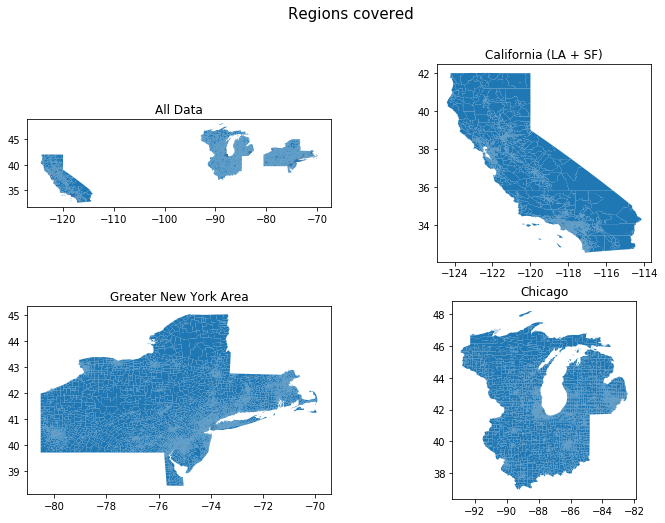

In [39]:
fig, axes = pyplot.subplots(ncols=2, nrows=2, figsize=(12,8))

all_shp.plot(ax=axes[0, 0])
all_shp[(all_shp['STATEFP']=='06')].plot(ax=axes[0, 1])
all_shp[(all_shp['STATEFP']=='09')|(all_shp['STATEFP']=='34')|(all_shp['STATEFP']=='36')|(all_shp['STATEFP']=='10')|(all_shp['STATEFP']=='25')|(all_shp['STATEFP']=='42')|(all_shp['STATEFP']=='44')].plot(ax=axes[1, 0])
all_shp[(all_shp['STATEFP']=='26')|(all_shp['STATEFP']=='17')|(all_shp['STATEFP']=='18')|(all_shp['STATEFP']=='55')].plot(ax=axes[1, 1])

fig.suptitle("Regions covered",fontsize=15)
axes[0, 0].set_title('All Data')
axes[0, 1].set_title('California (LA + SF)')
axes[1, 0].set_title('Greater New York Area')
axes[1, 1].set_title('Chicago')

Text(0.5, 1.0, 'Chicago')

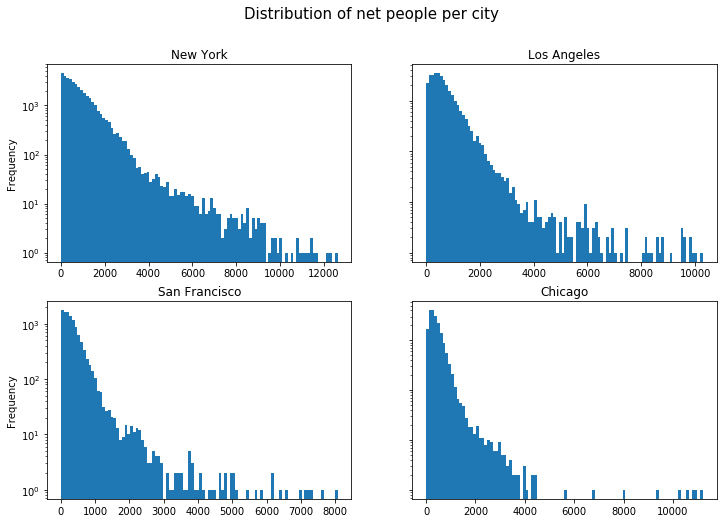

In [40]:
fig, axes = pyplot.subplots(ncols=2, nrows=2, figsize=(12,8))

all_df[all_df['city']=='ny'].net.plot(ax=axes[0, 0],kind='hist',bins=100,logy=True,sharey=True)
all_df[all_df['city']=='la'].net.plot(ax=axes[0, 1],kind='hist',bins=100,logy=True,sharey=True)
all_df[all_df['city']=='sf'].net.plot(ax=axes[1, 0],kind='hist',bins=100,logy=True,sharey=True)
all_df[all_df['city']=='chic'].net.plot(ax=axes[1, 1],kind='hist',bins=100,logy=True,sharey=True)

fig.suptitle("Distribution of net people per city",fontsize=15)
axes[0, 0].set_title('New York')
axes[0, 1].set_title('Los Angeles')
axes[1, 0].set_title('San Francisco')
axes[1, 1].set_title('Chicago')

In [41]:
output_notebook()

Loading BokehJS ...

In [42]:
def getPolyCoords(row, geom, coord_type):
    """Returns the coordinates ('x' or 'y') of edges of a Polygon exterior"""
    join_row = all_shp[all_shp['GEOID']==row[geom]]
    join_row = join_row['geometry']
    
    # Parse the exterior of the coordinate
    try:
        exterior = list(join_row)[0].exterior
    except:
        exterior = join_row.all()[0].exterior
    
    if coord_type == 'x':
        # Get the x coordinates of the exterior
        return list( exterior.coords.xy[0] )
    elif coord_type == 'y':
        # Get the y coordinates of the exterior
        return list( exterior.coords.xy[1] )
    
def getGeom(row, geom):
    join_row = all_shp[all_shp['GEOID']==row[geom]]
    return list(join_row['geometry'])[0]

In [43]:
def getVectorCoords(row, geom, coord_type):
    """Returns the coordinates ('x' or 'y') of edges of a Polygon exterior"""
    join_row = all_shp[all_shp['GEOID']==row[geom]]
    join_row = list(join_row['geometry'])[0]
    
    # Parse the exterior of the coordinate
    centroid = join_row.centroid

    if coord_type == 'x':
        # Get the x coordinates of the exterior
        return centroid.coords.xy[0][0]
    elif coord_type == 'y':
        # Get the y coordinates of the exterior
        return centroid.coords.xy[1][0]

In [44]:
all_df['geometry'] = all_df.apply(getGeom, geom='ct_id', axis=1)
all_df = gpd.GeoDataFrame(all_df)
#all_df.to_csv('d3_data.csv')

In [45]:
all_df['type'] = all_df['geometry'].map(lambda x: x.type)
all_df = all_df[all_df['type']=='Polygon']

In [27]:
#all_df[all_df['city']=='sf'][['ct_id','time_period','color',]].to_csv('d3_data_sf.csv',index=False,index_label=False)

In [46]:
# Get the Polygon Centroid x and y coordinates
#all_df['x'] = all_df.apply(getVectorCoords, geom='ct_id', coord_type='x', axis=1)
#all_df['y'] = all_df.apply(getVectorCoords, geom='ct_id', coord_type='y', axis=1)
# Get the Polygon x and y coordinates
all_df['x_p'] = all_df.apply(getPolyCoords, geom='ct_id', coord_type='x', axis=1)
all_df['y_p'] = all_df.apply(getPolyCoords, geom='ct_id', coord_type='y', axis=1)

In [47]:
all_df.drop(columns=['geometry','type'],inplace=True)
all_df.head()

,binned,city,color,ct_id,net,time_period,x_p,y_p
0,1,ny,green,9001010101,129,10:00 - 10:30,"[-73.727775, -73.6960060114926, -73.6959488909...","[41.100696, 41.1154076779464, 41.1154341295047..."
1,1,ny,green,9001010101,114,6:00 - 6:30,"[-73.727775, -73.6960060114926, -73.6959488909...","[41.100696, 41.1154076779464, 41.1154341295047..."
2,1,ny,green,9001010101,134,6:30 - 7:00,"[-73.727775, -73.6960060114926, -73.6959488909...","[41.100696, 41.1154076779464, 41.1154341295047..."
3,1,ny,green,9001010101,142,7:00 - 7:30,"[-73.727775, -73.6960060114926, -73.6959488909...","[41.100696, 41.1154076779464, 41.1154341295047..."
4,1,ny,green,9001010101,247,7:30 - 8:00,"[-73.727775, -73.6960060114926, -73.6959488909...","[41.100696, 41.1154076779464, 41.1154341295047..."


In [48]:
# Make a copy, drop the geometry column and create ColumnDataSource
all_df_source = all_df.copy()
all_df_source = ColumnDataSource(all_df_source)

In [17]:
#boro_shp = gpd.read_file("Borough Boundaries/geo_export_dab0de5c-dadd-4bea-9105-37b2d151df7e.shp")

In [49]:
def getAllBoro(geoms,boros):
    x = []
    y = []
    boro_list = []
    for geom, boro in zip(geoms,boros):
        try:
            for sub_geom in geom:
                x.append(list(sub_geom.exterior.coords.xy[0]))
                y.append(list(sub_geom.exterior.coords.xy[1]))
                boro_list.append(boro)
        except:
            x.append(list(geom.exterior.coords.xy[0]))
            y.append(list(geom.exterior.coords.xy[1]))
            boro_list.append(boro)
    return x,y,boro_list

In [19]:
#x,y,boro_list = getAllBoro(all_shp['geometry'],all_shp['TRACTCE'])
#ct_source = pd.DataFrame(data = {'x':x,'y':y,'ct_name':boro_list})
#ct_source = ct_source.copy()
#ct_source = ColumnDataSource(ct_source)

In [20]:
#x,y,boro_list = getAllBoro(boro_shp['geometry'],boro_shp['boro_name'])
#boro_source = pd.DataFrame(data = {'x':x,'y':y,'boro_name':boro_list})
#boro_source = boro_source.copy()
#boro_source = ColumnDataSource(boro_source)

In [50]:
available_cities = list(all_df['city'].unique())

In [51]:
def modify_doc(doc):
    
    def make_dataset(cities_list,range_start,range_end):
        times_list = []
        for i in [x/10.0 for x in range(range_start*10,range_end*10+5,5)]:
            if(i%1==0):
                times_list.append(str(int(i)) + ':00'+ ' - ' + str(int(i)) + ':30')
            else:
                times_list.append(str(int(i)) + ':30'+ ' - ' + str(int(i+1)) + ':00')

        subset = all_df[(all_df['time_period'].isin(times_list))&(all_df['city'].isin(cities_list))]

        return ColumnDataSource(subset)
    
    def make_boundaries(cities_list):
        ct_dict = {'ny':['09','10','25','34','36','42','44'],'la':['06'],'sf':['06'],'chic':['17','18','26','55']}
        ct_list = []
        
        for city in cities_list:
            ct_list.extend(ct_dict.get(city))
        
        subset = all_shp[all_shp['STATEFP'].isin(ct_list)]
        x,y,boro_list = getAllBoro(subset['geometry'],subset['TRACTCE'])
        subset = pd.DataFrame(data = {'x':x,'y':y,'ct_name':boro_list})
        
        return ColumnDataSource(subset)
    
    def make_plot(src, ct_src):
        # Blank plot with correct labels
        p = figure(plot_width = 700, plot_height = 600, 
                  title = 'GPS Commute by Time Period and Cities')

        # Plot grid
        p.patches('x', 'y', source=ct_src, fill_alpha=0.00, line_color="black", line_width=0.2)

        #p.circle(x='x', y='y', source=src, color={'field':'color'}, size=5.0)
        
        p.patches('x_p', 'y_p', source=src, color={'field':'color'}, line_color="black", line_width=0.5)

        #Add Hover
        #hover = HoverTool(tooltips = [('(x,y)', '($x,$y)'),('gain', '@gain'),('loss', '@loss'),('stay', '@stay')],mode = 'vline')
        #p.add_tools(hover)

        return p
    
    # Update function takes three default parameters
    def update(attr, old, new):
        # Get the list of carriers for the graph
        cities_to_plot = [cities_selection.labels[i] for i in 
                            cities_selection.active]
        
        # Value for the range slider is a tuple (start, end)

        range_start = range_select.value[0]

        range_end = range_select.value[1]

        # Make a new dataset based on the selected info and the 
        # make_dataset function defined earlier
        new_src = make_dataset(cities_to_plot,range_start,range_end)

        # Update the source used the quad glpyhs
        src.data.update(new_src.data)
        
        new_ct_src = make_boundaries(cities_to_plot)
        ct_src.data.update(new_ct_src.data)

        
    cities_selection = CheckboxGroup(labels=available_cities, active = [0])
    cities_selection.on_change('active', update)
    
    
    # RangeSlider to change the maximum and minimum values on time_period

    range_select = RangeSlider(start = 6, end = 10, value = (6, 8),

                               step = 1, title = 'Time Range')

    # Update the plot when the value is changed

    range_select.on_change('value', update)

    
    controls = WidgetBox(cities_selection,range_select)
    
    initial_cities = [cities_selection.labels[i] for i in cities_selection.active]
    
    src = make_dataset(initial_cities,6,8)
    ct_src = make_boundaries(initial_cities)
    
    p = make_plot(src, ct_src)
    
    layout = row(controls, p)
    doc.add_root(layout)
    
# Set up an application
handler = FunctionHandler(modify_doc)
app = Application(handler)

In [ ]:
show(app)